In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [2]:
originalImage = cv2.imread('original.png')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
_, blackAndWhiteImage = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
original_data = blackAndWhiteImage[8:,:]
original_data = np.where(original_data == 255, 1, -1)

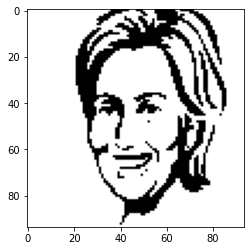

In [3]:
plt.imshow(original_data, cmap=plt.cm.gray)

In [4]:
originalImage = cv2.imread('noisy_image.png')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
_, blackAndWhiteImage = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
noisy_data = blackAndWhiteImage[8:,:]
noisy_data = np.where(noisy_data == 255, 1, -1)

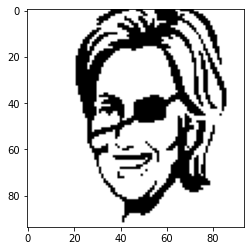

In [5]:
plt.imshow(noisy_data, cmap=plt.cm.gray)

In [6]:
def init_weights(input_vectors):
    a = input_vectors
    a = np.expand_dims(a, 1)
    weights = np.matmul(a, a.T)
    for i in range(input_vectors.shape[0]):
        weights[i][i] = 0
    return weights

In [7]:
weights = init_weights(original_data.reshape(-1))

In [13]:
def activate(yi, theta=0):
    if yi > theta:
        return 1
    else:
        return -1

In [35]:
def predict(input_image, weights):
    history = np.zeros((input_image.shape[0]))
    y = input_image
    converged = False
    while not converged:
        random_indices = np.random.permutation(np.arange(len(input_image)))
        for index in random_indices:
            y[index] = input_image[index] + np.dot(y, weights[index])
            y[index] = activate(y[index])
        if (y != history).any():
            converged = True
        history = y
    return history

In [36]:
input_image = noisy_data.reshape(-1)
history = predict(input_image, weights)
print((history == input_image).all())

True


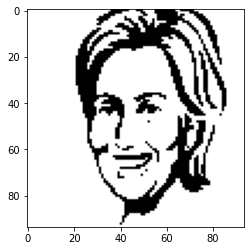

In [37]:
plt.imshow(history.reshape([94, 94]), cmap=plt.cm.gray)